In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

## define A, b
システムA, bを決定する

In [2]:
m = 5
n = 10

In [3]:
A = np.random.randint(low=0, high=4, size=(m, n))
b = np.random.randint(low=1, high=11, size=(m, ))

A, b

(array([[1, 0, 0, 1, 0, 0, 1, 1, 1, 2],
        [0, 2, 3, 1, 3, 0, 3, 0, 3, 1],
        [3, 0, 1, 1, 1, 3, 0, 0, 2, 1],
        [1, 3, 1, 2, 1, 1, 1, 0, 2, 1],
        [0, 3, 2, 1, 2, 3, 2, 1, 1, 0]]),
 array([2, 3, 9, 9, 9]))

## define b

In [4]:
w_init = np.random.random(size=(n, ))
w_init

array([0.2042276 , 0.07574155, 0.04539113, 0.06490034, 0.40643011,
       0.59378997, 0.91521558, 0.50536697, 0.28245465, 0.45155195])

In [5]:
def f(A_, b_, w_, lam_):
    return LA.norm((b_ - A_@w_), ord=2) + lam_ * LA.norm(w_, ord=2)


In [6]:
def SteepestDescent(A, b, w, lam, iter=101): 
    # Hesse行列、最大固有値の計算
    Hesse = A.T@A + lam * np.identity(n)
    u, v = LA.eig(Hesse)
    L = abs(u).max()
    print(L)

    f_step = np.zeros(iter)
    
    for k in range(iter):
        # df/dw
        f = LA.norm((b - A@w), ord=2) + lam * LA.norm(w, ord=2)
        f_step[k] = f
        dfdw = A.T@A@w - A.T@b + lam*w
        w = w - (1/L) * dfdw
        
    return f_step

In [7]:
def ArmijoSteepestDescent(A, b, w, lam, iter=101): 
    alpha = 0.01
    beta = 0.8

    f_step = np.zeros(iter)
    
    for k in range(iter):
        # df/dw
        f = LA.norm((b - A@w), ord=2) + lam * LA.norm(w, ord=2)
        f_step[k] = f
        dfdw = A.T@A@w - A.T@b + lam*w
        
        d = -dfdw
        l = 0
        cond = True
        while cond:
            # f(A, b, w+(beta**l)*d, lam) - f(A, b, w, lam)
            lhs = LA.norm((b - A@(w+(beta**l)*d)), ord=2) + lam * LA.norm(w+(beta**l)*d, ord=2) - (LA.norm((b - A@w), ord=2) + lam * LA.norm(w, ord=2))
            rhs = alpha*(beta**l)*d.T@d
            
            if (lhs <= rhs):
                cond = False
            l += 1
        
        w = w + (beta**l) * d
        
    return f_step

100.71168159502038


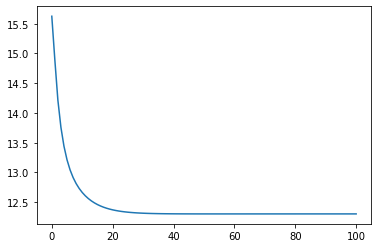

In [8]:
lam = 5
w = np.copy(w_init)
fstep_lam5 = SteepestDescent(A, b, w, lam)
plt.plot(fstep_lam5)

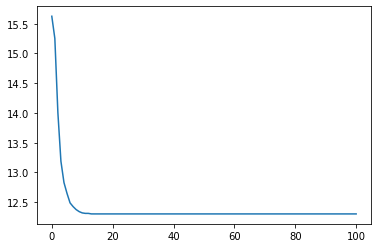

In [9]:
lam = 5
w = np.copy(w_init)
Almijo_lam5 = ArmijoSteepestDescent(A, b, w, lam)
plt.plot(Almijo_lam5)

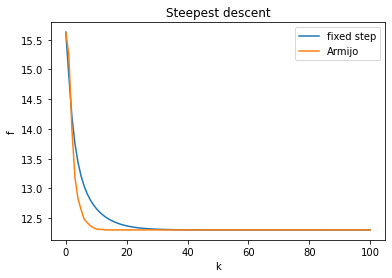

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('f')
ax.set_title(r'Steepest descent')

ax.plot(fstep_lam5, label='fixed step')
ax.plot(Almijo_lam5, label='Armijo')
ax.legend()
plt.savefig('SG_Armijo.png')
plt.show()